In [ ]:
import pandas as pd
breast = pd.read_csv('/content/drive/MyDrive/datasets/breast-cancer.csv')
breast.describe()

,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,142.000000,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,284.000000,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,426.000000,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,568.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
breast.isna().sum()

Unnamed: 0                 0
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

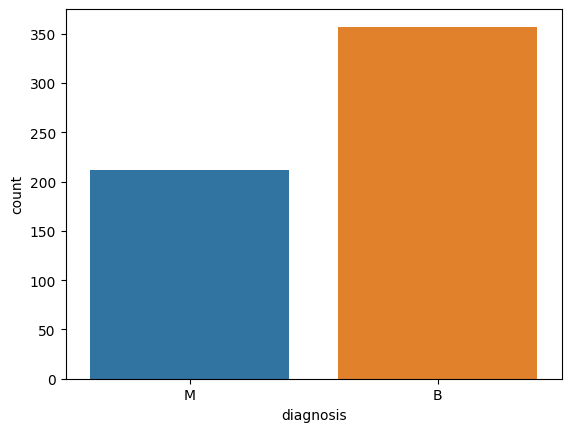

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x = 'diagnosis', data = breast)

feature_columns = list(credit.columns.difference(['credit.rating', 'Unnamed: 0'	]))

In [ ]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

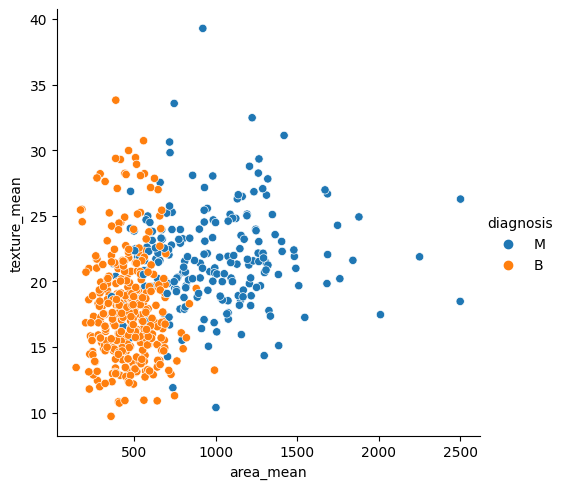

In [ ]:
sns.relplot(x = 'area_mean', y= 'texture_mean', hue = 'diagnosis', data = breast)
# 'area_mean'을 x-축으로, 'texture_mean'을 y-축으로 하고, 타겟 변수인 'diagnosis' 열을 기준으로 색상을 구분하여 데이터를 시각화

In [ ]:
# 'diagnosis', 'Unnamed: 0', 'id' 열을 제외한 나머지 열을 선택하여 상관 계수를 계산.
breast_corr = breast.drop(['diagnosis', 'Unnamed: 0', 'id'], axis=1).corr()

# 상관 계수 행렬을 피봇 테이블로 변환.
correlation_pivot = breast_corr.stack().reset_index() #데이터 프레임을 "스택" 형태로 변환
correlation_pivot.columns = ['Feature 1', 'Feature 2', 'Correlation']

# 상관 계수가 0.7 이상인 항목만 필터링하여 출력.
high_corr_pivot = correlation_pivot[(correlation_pivot['Correlation'] >= 0.7) & (correlation_pivot['Feature 1'] != correlation_pivot['Feature 2'])]

print(high_corr_pivot)

                   Feature 1               Feature 2  Correlation
2                radius_mean          perimeter_mean     0.997855
3                radius_mean               area_mean     0.987357
7                radius_mean     concave points_mean     0.822529
13               radius_mean                 area_se     0.735864
20               radius_mean            radius_worst     0.969539
..                       ...                     ...          ...
833     concave points_worst              area_worst     0.747419
835     concave points_worst       compactness_worst     0.801080
836     concave points_worst         concavity_worst     0.855434
879  fractal_dimension_worst  fractal_dimension_mean     0.767297
895  fractal_dimension_worst       compactness_worst     0.810455

[140 rows x 3 columns]


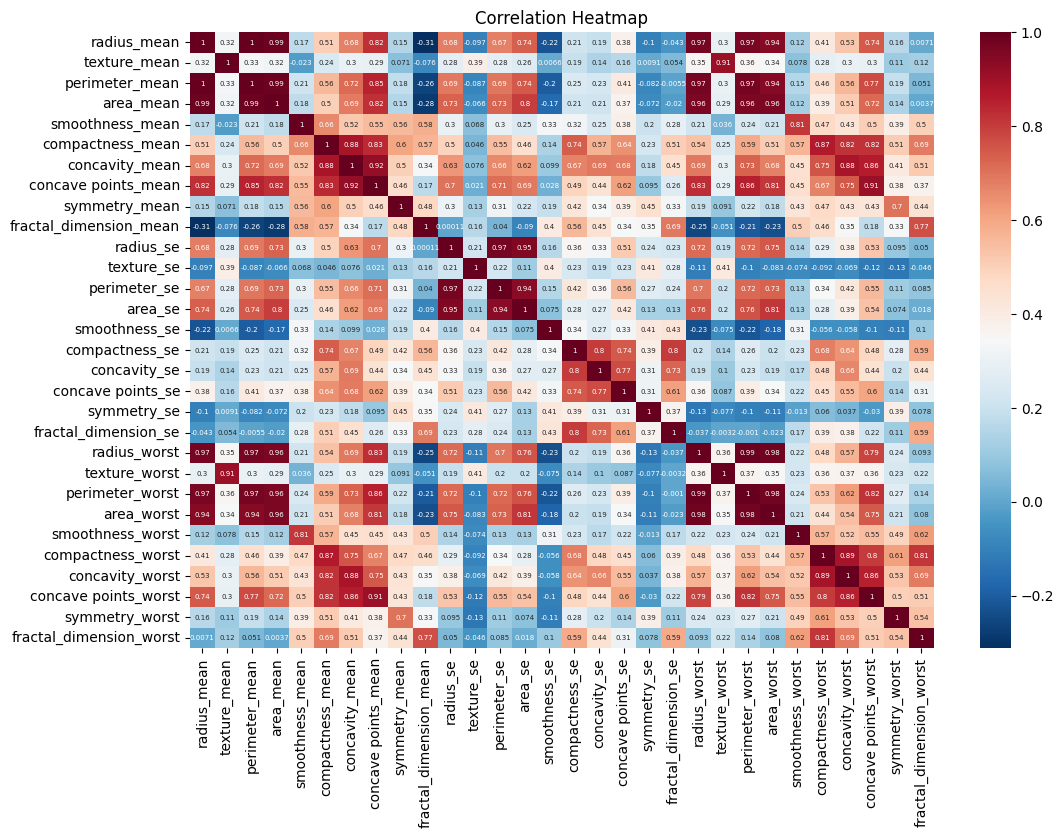

In [ ]:

# 'diagnosis', 'Unnamed: 0', 'id' 열을 제외한 나머지 열을 선택하여 상관 계수를 계산.
breast_corr = breast.drop(['diagnosis', 'Unnamed: 0', 'id'], axis=1).corr()

# heatmap을 그립니다.
plt.figure(figsize=(12, 8))
sns.heatmap(breast_corr, cmap='RdBu_r', annot=True, annot_kws={'size': 5})  # annot_kws를 사용하여 글자 크기를 조절  # annot=True를 사용하면 각 셀에 상관 계수 값을 표시.
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

breast['diagnosis'] = np.where(breast['diagnosis']== 'M', 1, 0)
features = ['area_mean', 'area_worst']
x = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 45, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator = DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score: {}'.format(clf.score(x_test, y_test)))
print('Accuracy Score: {}'.format(clf.score(x_test, y_test)))
#clf.score() 메서드는 분류 모델에서 정확도(accuracy)를 계산하여  clf.score(x_test, y_test)  accuracy_score(y_test, pred) 주의 해야됨


Accuracy Score: 0.9122807017543859
Accuracy Score: 0.9122807017543859


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_test.shape, pred.shape

((171,), (171,))

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# 데이터프레임으로 변환하고 인덱스와 열 이름을 설정.
df_conf_matrix = pd.DataFrame(confusion_matrix(y_test, pred), index=['True[0]', 'True[1]'], columns=['Pred[0]', 'Pred[1]'])

# 데이터프레임을 출력.
print(df_conf_matrix)

         Pred[0]  Pred[1]
True[0]      100        7
True[1]        8       56


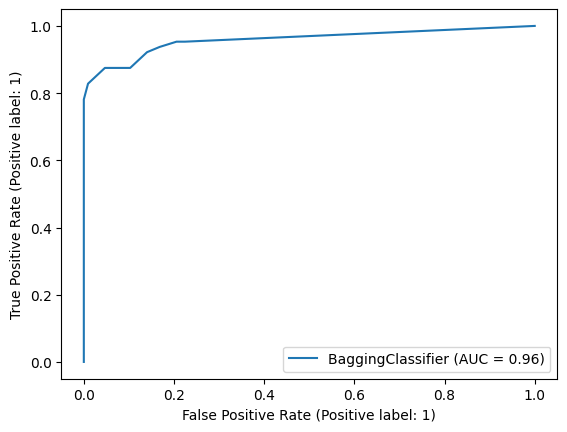

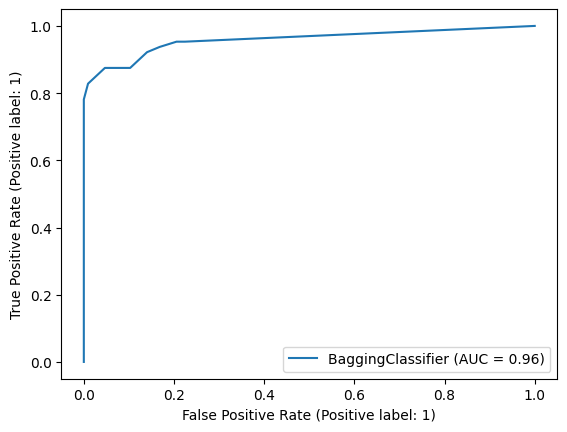

In [ ]:
from sklearn.metrics import RocCurveDisplay

roc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)

roc_disp.plot()
plt.show()

#oob_score = True 를 하면 train_test_split 을 통한 교차 검정 이나 검정 세트 구성 할 필요없음 그러나.....
##OOB 평가는 초기 성능 지표로 유용하지만, 최종 모델의 성능을 평가하고 일반화 능력을 검증하기 위해서는 추가적인 검증 세트나 교차 검증 절차가 여전히 중요


In [ ]:
clf_oob = BaggingClassifier(base_estimator = DecisionTreeClassifier(), oob_score = True) #oob_score = True
ood = clf_oob.fit(x, y).oob_score_
print(ood)

0.9244288224956063


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


# 배깅의 교차검정 cross_val_score(bagging_clf, X, y, cv=5)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

# 예제 데이터셋 로드 (아이리스 데이터셋 사용)
iris = load_iris()
X, y = iris.data, iris.target

# BaggingClassifier 정의 (DecisionTreeClassifier를 기본 추정기로 사용)
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)

# 교차 검증 수행 (예: 5-겹 교차 검증)
cv_scores = cross_val_score(bagging_clf, X, y, cv=5)

print(cv_scores)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/l

In [ ]:
car.isna().sum()

Unnamed: 0          0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64